In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

acs_state = pd.read_csv(r"datasets/ACS_15_5YR_S0801_bystate/ACS_15_5YR_S0801_with_ann.csv", 
                     sep=",", header=0, skipinitialspace=True, index_col="GEO.display-label")

print(acs_state.columns)
acs_state.head()

Index(['GEO.id', 'GEO.id2', 'HC01_EST_VC01', 'HC01_MOE_VC01', 'HC02_EST_VC01',
       'HC02_MOE_VC01', 'HC03_EST_VC01', 'HC03_MOE_VC01', 'HC01_EST_VC03',
       'HC01_MOE_VC03',
       ...
       'HC02_EST_VC69', 'HC02_MOE_VC69', 'HC03_EST_VC69', 'HC03_MOE_VC69',
       'HC01_EST_VC70', 'HC01_MOE_VC70', 'HC02_EST_VC70', 'HC02_MOE_VC70',
       'HC03_EST_VC70', 'HC03_MOE_VC70'],
      dtype='object', length=344)


,GEO.id,GEO.id2,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,HC01_EST_VC03,HC01_MOE_VC03,...,HC02_EST_VC69,HC02_MOE_VC69,HC03_EST_VC69,HC03_MOE_VC69,HC01_EST_VC70,HC01_MOE_VC70,HC02_EST_VC70,HC02_MOE_VC70,HC03_EST_VC70,HC03_MOE_VC70
GEO.display-label,,,,,,,,,,,,,,,,,,,,,
Alabama,0400000US01,1,1995472,6442,1052977,4608,942495,4539,94.6,0.1,...,(X),(X),(X),(X),1.7,(X),(X),(X),(X),(X)
Alaska,0400000US02,2,356987,2290,198902,1546,158085,1495,80.5,0.4,...,(X),(X),(X),(X),1.3,(X),(X),(X),(X),(X)
Arizona,0400000US04,4,2777754,7744,1491390,5036,1286364,4783,87.6,0.2,...,(X),(X),(X),(X),1.3,(X),(X),(X),(X),(X)
Arkansas,0400000US05,5,1236999,5389,657119,3490,579880,3239,93.3,0.2,...,(X),(X),(X),(X),1.0,(X),(X),(X),(X),(X)
California,0400000US06,6,16869052,17483,9215308,13231,7653744,12990,84.2,0.1,...,(X),(X),(X),(X),1.0,(X),(X),(X),(X),(X)


In [3]:
acs_state["Car"] = acs_state["HC01_EST_VC04"] + acs_state["HC01_EST_VC05"]
acs_state["Public Transit"] = acs_state["HC01_EST_VC10"] 
acs_state["Walk or Bike"] = acs_state["HC01_EST_VC11"] + acs_state["HC01_EST_VC12"] 
acs_state["Other"] = acs_state["HC01_EST_VC13"] + acs_state["HC01_EST_VC14"] 

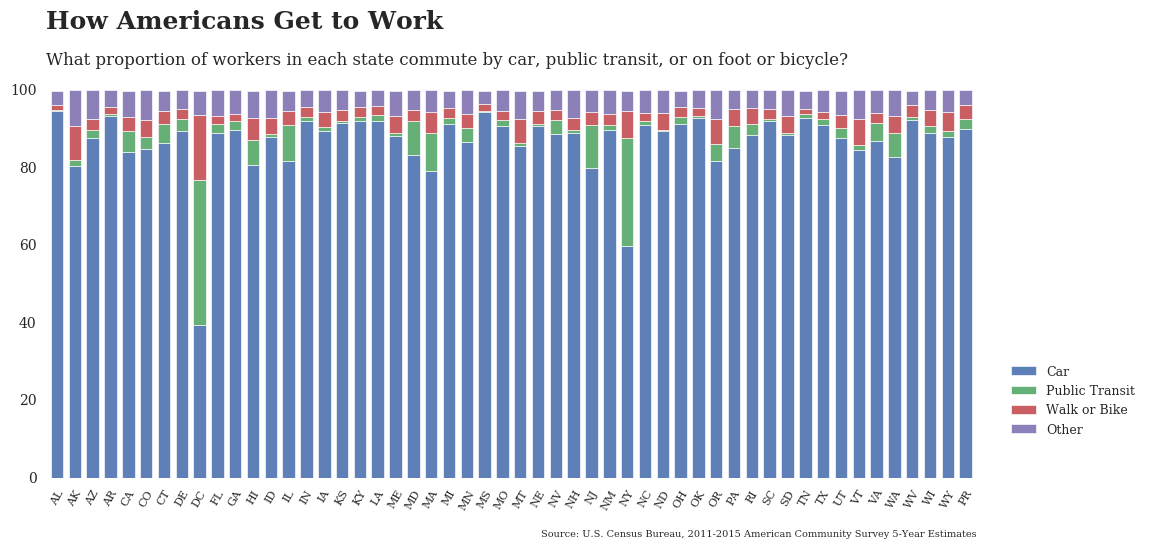

In [5]:
ax = acs_state.plot(y=["Car","Public Transit","Walk or Bike","Other"], ylim=(0,100), kind="bar", stacked=True, figsize=(12,5), legend=False, width=.7, edgecolor="#FFFFFF",lw=0.5, alpha=0.9)
ax.legend(loc='center left', bbox_to_anchor=(1.025, 0.2), prop={"family":"serif", "size":9})
ax.grid(linewidth=0)
ax.annotate(s="Source: U.S. Census Bureau, 2011-2015 American Community Survey 5-Year Estimates", xy=(1,-0.15), xycoords="axes fraction", family="serif", fontsize=7, ha="right")
ax.set_xticklabels(["AL","AK","AZ","AR","CA","CO","CT","DE","DC",'FL',"GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY","PR"])
# ax.set_yticklabels(["0",'','','','',"100"])
for item in ax.get_xticklabels():
    item.set_rotation(60)
    item.set_horizontalalignment('center')
    item.set_size(8)
    item.set_family("serif")
    
for item in ax.get_yticklabels():
    item.set_family("serif")

ax.set_axis_bgcolor('white')

plt.suptitle("How Americans Get to Work", fontsize=18, fontweight='bold', x=0.125, y=1.0625, family="serif", ha="left")
plt.title("What proportion of workers in each state commute by car, public transit, or on foot or bicycle?", x=0, y=1.05, ha="left",family="serif")
plt.xlabel("")